Key measure wanted:

Total patents for each specific renewable energy type across time periods

In [ ]:
import pandas as pd
import numpy as np
import os
import glob

from datetime import datetime
import matplotlib as mplib
import matplotlib.pyplot as plt # visualization package 1
import seaborn as sns           # visualization package 2
import matplotlib.ticker as ticker
# so images get plotted in the notebook
%matplotlib inline

import random

In [ ]:
#!ls /datasets/shared-dataset-g7 #run shared dataset (grant abstracts with grant information)

We want patents from 2010 to 2018. Thus we will gather a list of years, then loop through each year, reading in the csv files each time, and then concat the appended list of dataframe version of the patents.

In [ ]:
path = "C:/Users/achen/"

patent_2010_2018 = []
for year in list(range(2012,2019)):
    patent = pd.read_csv(path+'Patents/Patents/patents_' + str(year) + '.csv', low_memory=False, skipinitialspace=True) 
    patent_2010_2018.append(patent)  # append that dataframe to a list

# Concatenate all the dataframes together into one dataframe
patent_2010_2018_df = pd.concat(patent_2010_2018)
patent_2010_2018_df.to_csv('patent_2010_2018_df.csv', encoding='utf8')

In [ ]:
patent_df=pd.read_csv('patent_2010_2018_df.csv', skipinitialspace=True)
patent_df.head()

,Unnamed: 0,patent_number,patent_title,patent_abstract,patent_num_cited_by_us_patents,patent_date,app_date,patent_firstnamed_inventor_name_first,patent_firstnamed_inventor_name_last,patent_firstnamed_inventor_city,patent_firstnamed_inventor_state,patent_firstnamed_inventor_latitude,patent_firstnamed_inventor_longitude,patent_firstnamed_assignee_organization,patent_firstnamed_assignee_city,patent_firstnamed_assignee_state,patent_firstnamed_assignee_latitude,patent_firstnamed_assignee_longitude
0,0,7640602,Assembled anti-creep waist-clothing stay devic...,A pre-assembled anti-creep waist-clothing stay...,1,2010-01-05,2005-04-01,Catherine,Chetelat,Baltimore,MD,39.2903,-76.6125,"ProductMasters, Inc.",Baltimore,MD,39.2903,-76.6125
1,1,7640606,Mattress hugging bed rail,A bed rail structured to minimize the gap betw...,15,2010-01-05,2007-10-31,Mark A.,Flannery,Lakeville,MN,44.6497,-93.2425,"Regalo International, LLC",Prior Lake,MN,44.7133,-93.4225
2,2,7712163,Portable child bed,A portable child bed in the nature of a cot. T...,5,2010-05-11,2006-11-30,Mark A.,Flannery,Lakeville,MN,44.6497,-93.2425,"Regalo International, LLC",Prior Lake,MN,44.7133,-93.4225
3,3,7832555,Apparatus for assisting in the changing of dia...,The apparatus includes a first compartment for...,8,2010-11-16,2007-05-27,Mark A.,Flannery,Lakeville,MN,44.6497,-93.2425,"Regalo International, LLC",Prior Lake,MN,44.7133,-93.4225
4,4,7845719,Adjustable height hook on high chair,A hook on high chair that includes a base unit...,5,2010-12-07,2008-03-31,Mark A.,Flannery,Lakeville,MN,44.6497,-93.2425,"Regalo International, LLC",Prior Lake,MN,44.7133,-93.4225


In [ ]:
patent_df.columns

Index(['Unnamed: 0', 'patent_number', 'patent_title', 'patent_abstract',
       'patent_num_cited_by_us_patents', 'patent_date', 'app_date',
       'patent_firstnamed_inventor_name_first',
       'patent_firstnamed_inventor_name_last',
       'patent_firstnamed_inventor_city', 'patent_firstnamed_inventor_state',
       'patent_firstnamed_inventor_latitude',
       'patent_firstnamed_inventor_longitude',
       'patent_firstnamed_assignee_organization',
       'patent_firstnamed_assignee_city', 'patent_firstnamed_assignee_state',
       'patent_firstnamed_assignee_latitude',
       'patent_firstnamed_assignee_longitude'],
      dtype='object')

In [ ]:
patent_df.patent_number.isna().sum()

0

In [ ]:
patent_df['Patent_Year']=pd.to_datetime(patent_df['patent_date']).dt.year
patent_df['patent_abstract']=patent_df['patent_abstract'].str.lower()
patent_df['patent_title']=patent_df['patent_title'].str.lower()

In [ ]:
patent_df.duplicated(subset=['patent_number']).any()

False

In [ ]:
all_patents=patent_df.groupby('Patent_Year')['patent_number'].nunique().to_frame().reset_index()
all_patents.rename(columns={"patent_number":"number of patents"}, inplace=True)
#all_patents

Let's look at the relationship between number of patents across years in a line plot. There seems to be an increase, with spikes at 2013 and 2017. 

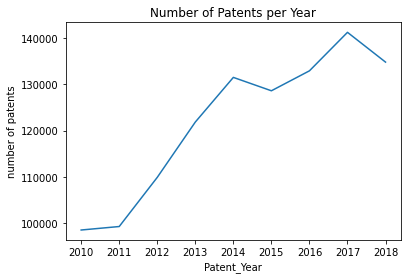

In [ ]:
sns.lineplot(x="Patent_Year", y="number of patents", data=all_patents)
plt.title("Number of Patents per Year")
plt.savefig('Patents_per_yr.jpg', bbox_inches='tight')
plt.show()

Since we know that some of the patents are not included or marked as NaN in the data set, we will look at just the project titles for those to filter them based on the renewable energy types: 'solar | wind power | wind turbine | biomass | biofuel | geothermal'

For patents that are not NaN, we would filter directly on the patent abstracts

Using the two filtered dataframes, we will concatenate them to form a dataframe with all relevant patents to our topic. 

Now we want to expand the approach to only renewable patents across all years. We see that it has a spike near 2014 and 2016. This seems a bit strange that the number of renewable patents goes up and dips in fluctuation. 

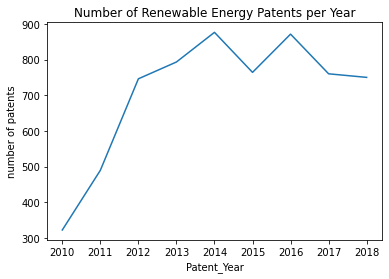

In [ ]:
p_emptyab=patent_df[patent_df['patent_abstract'].isna()]
non_emptyab=patent_df[patent_df['patent_abstract'].notna()]
RE_ppyr1=p_emptyab[p_emptyab['patent_title'].str.contains('solar | wind power | wind turbine | biomass | biofuel | geothermal')]
RE_ppyr2=non_emptyab[non_emptyab['patent_abstract'].str.contains('solar | wind power | wind turbine | biomass | biofuel | geothermal')]
RE_ppyr=pd.concat([RE_ppyr1, RE_ppyr2])
combo_df=RE_ppyr.groupby('Patent_Year')['patent_number'].nunique().to_frame().reset_index()
combo_df=combo_df.rename(columns={'patent_number':"number of patents"})
sns.lineplot(x="Patent_Year", y="number of patents", data=combo_df)
plt.title("Number of Renewable Energy Patents per Year")
plt.savefig('RE_Patents_per_yr.jpg', bbox_inches='tight')
plt.show()

In [ ]:
p_emptyab=patent_df[patent_df['patent_abstract'].isna()]
non_emptyab=patent_df[patent_df['patent_abstract'].notna()]
RE_ppyr1=p_emptyab[p_emptyab['patent_title'].str.contains('solar | wind power | wind turbine | biomass | biofuel | geothermal')]
RE_ppyr2=non_emptyab[non_emptyab['patent_abstract'].str.contains('solar | wind power | wind turbine | biomass | biofuel | geothermal')]
RE_ppyr=pd.concat([RE_ppyr1, RE_ppyr2])
len(RE_ppyr)

6373

Here we group by inventor first name and last name to see the number of patents each one of them produced.

In [ ]:
RE_types=['solar', 'wind power | wind turbine','biomass | biofuel','geothermal']
PI_patents=RE_ppyr.groupby(['patent_firstnamed_inventor_name_first','patent_firstnamed_inventor_name_last'])['patent_number'].nunique()
PI_df=PI_patents.to_frame().reset_index()
PI_df=PI_df.rename(columns={'patent_firstnamed_inventor_name_first':'first_name','patent_firstnamed_inventor_name_last':'last_name','patent_number':'number of patents'})
top_10_PIs=PI_df.sort_values(by='number of patents', ascending=False).head(10)
top_10_PIs.reset_index(drop=True)

,first_name,last_name,number of patents
0,Joseph Broun,Powell,53
1,Marshall,Medoff,44
2,Aniket V.,Kale,34
3,Roy,McAlister,31
4,Michael C.,Cheiky,29
5,Bulent M.,Basol,26
6,Mehrdad M.,Moslehi,24
7,Sarah,Akin,22
8,Steven J.,Conger,22
9,Kyle L.,Fujdala,21


The following was just an attempt to compare the segmentation of renewable patents vs all the other patents

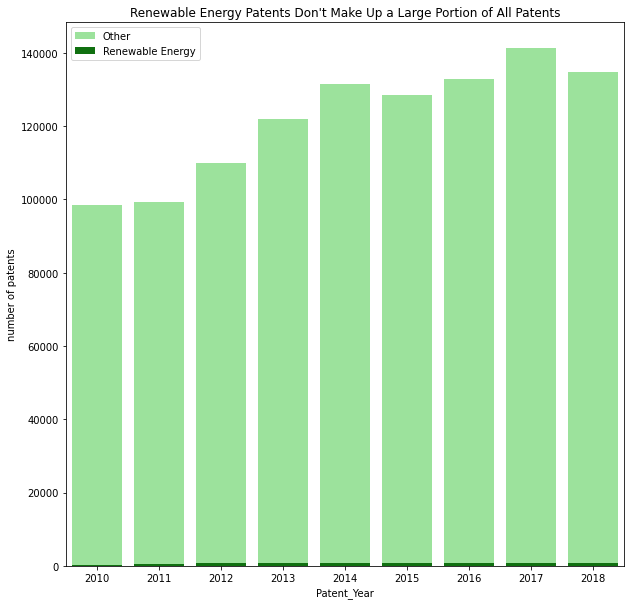

In [ ]:
#RE_patents_fil2['Percentage of RE Patents']=RE_patents_fil2['number of patents']/all_patents['number of patents']
plt.figure(figsize=(10,10))
sns.barplot(x='Patent_Year', y='number of patents', data=all_patents, color='lightgreen', label='Other')
sns.barplot(x='Patent_Year', y='number of patents', data=combo_df, color="green", label='Renewable Energy')
plt.title("Renewable Energy Patents Don't Make Up a Large Portion of All Patents")
plt.legend(loc='upper left')
plt.savefig('Segmentation_RE.jpg', bbox_inches='tight')
plt.show()

In [ ]:
print('matplotlib: {}'.format(mplib.__version__))

matplotlib: 3.5.1


## ARRA (2009-2013), there is a 3 year lag time for patent applications to be approved, thus we will look at patent data with the 'Patent_Year' from 2012-2016.

The following is the plot of the number of patents across renewable energy types from 2012-2016 to account for the time lag since grant funding.



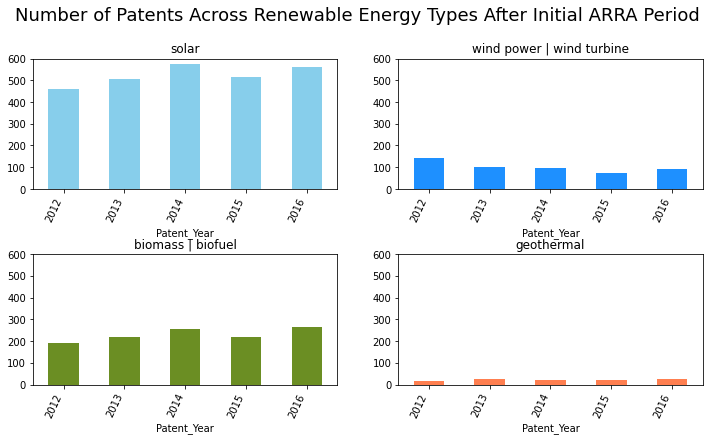

In [ ]:
patents=patent_df.copy()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Number of Patents Across Renewable Energy Types After Initial ARRA Period", fontsize=18, y=1)

colors=['skyblue','dodgerblue', 'olivedrab','coral']
RE_types=['solar', 'wind power | wind turbine','biomass | biofuel','geothermal']
for n, RE_type in enumerate(RE_types):
    #iterative subplots
    ax=plt.subplot(2,2,n+1)
    #now filter by each topic's total fiscal year cost throughout the years 
    RE_ppyr1=patents[patents['patent_abstract'].isna() & patents['patent_title'].str.contains(RE_type)]
    non_emptyab=patents[patents['patent_abstract'].notna()]
    RE_ppyr2=non_emptyab[non_emptyab['patent_abstract'].str.contains(RE_type)]
    combo_df=pd.concat([RE_ppyr1, RE_ppyr2]) #combined data sets 
    #separate by period 
    yf_df=combo_df[combo_df['Patent_Year'].between(2012,2016)]
    new_df=yf_df.groupby('Patent_Year')['patent_number'].nunique().to_frame()
    new_df=new_df.rename(columns={'patent_number':"number of "+str(RE_type)+" patents"})
    new_df["number of "+str(RE_type)+" patents"].plot(kind='bar', ax=ax, color=colors[n % len(colors)])
    #format the y-axis values & limit
    ax.set_title(str(RE_type))
    ax.set_ylim(0,600)
    plt.xticks(rotation=65, ha='right')
plt.savefig('ARRA_patent_multiplot.jpg', bbox_inches='tight')
plt.show()

## Post ARRA (2014-2018), accounting for patent lag time, we will look at patent data with the 'Patent_Year'  from 2017-2018 due to lack of patent data after 2018

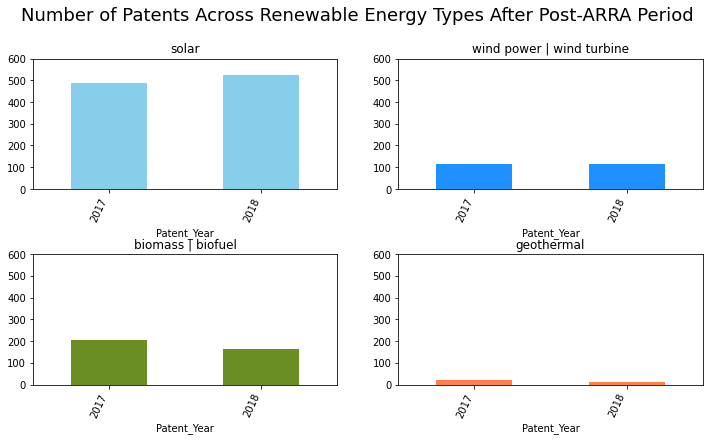

In [ ]:
patents=patent_df.copy()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Number of Patents Across Renewable Energy Types After Post-ARRA Period", fontsize=18, y=1)

colors=['skyblue','dodgerblue', 'olivedrab','coral']
RE_types=['solar', 'wind power | wind turbine','biomass | biofuel','geothermal']
for n, RE_type in enumerate(RE_types):
    #iterative subplots
    ax=plt.subplot(2,2,n+1)
    #now filter by each topic's total fiscal year cost throughout the years 
    RE_ppyr1=patents[patents['patent_abstract'].isna() & patents['patent_title'].str.contains(RE_type)]
    non_emptyab=patents[patents['patent_abstract'].notna()]
    RE_ppyr2=non_emptyab[non_emptyab['patent_abstract'].str.contains(RE_type)]
    combo_df=pd.concat([RE_ppyr1, RE_ppyr2]) #combined data sets 
    #separate by period 
    yf_df=combo_df[combo_df['Patent_Year'].between(2017,2018)]
    new_df=yf_df.groupby('Patent_Year')['patent_number'].nunique().to_frame()
    new_df=new_df.rename(columns={'patent_number':"number of "+str(RE_type)+" patents"})
    new_df["number of "+str(RE_type)+" patents"].plot(kind='bar', ax=ax, color=colors[n % len(colors)])
    #format the y-axis values & limit
    ax.set_title(str(RE_type))
    ax.set_ylim(0,600)
    plt.xticks(rotation=65, ha='right')
plt.savefig('PostARRA_patent_multiplot.jpg', bbox_inches='tight')
plt.show()

The following is the stacked bar chart of all renewable energy types across all years. 

This image was used on slide 14 to show that renewable energy patents have increased 2.5x since 2010.

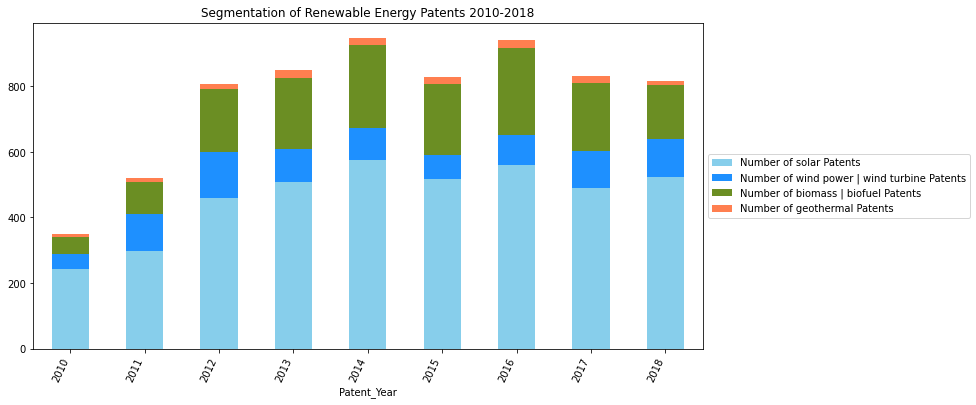

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

joined_types=patents.set_index('Patent_Year')

ax=joined_types.plot(kind='bar', stacked=True, figsize=(12,6), color=['skyblue','dodgerblue', 'olivedrab','coral'])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Segmentation of Renewable Energy Patents 2010-2018", )
plt.xticks(rotation=65, ha='right')
plt.savefig('RE_Segmentation_bars.jpg', bbox_inches='tight')
plt.show()

Lets inspect the time needed to approve a patent:

In [1]:
#helper function to calculate the days needed
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [ ]:
patent_df['start']=pd.to_datetime(patent_df['app_date'])
patent_df['end']=pd.to_datetime(patent_df['patent_date'])
patent_df['days'] = (patent_df['end'] - patent_df['start']).abs().dt.days

In [ ]:
#leap years in 2012 and 2016
patent_df[['start', 'end', 'days']].head(2)

,start,end,days
0,2005-04-01,2010-01-05,1740
1,2007-10-31,2010-01-05,797


In [ ]:
patent_df['days'].mean()/365
#Approximately a little over 3 years per patent 

3.087339099832664

In [ ]:
RE_types='solar | wind power | wind turbine | biomass | biofuel | geothermal'
p_emptyab=patent_df[patent_df['patent_abstract'].isna()]
non_emptyab=patent_df[patent_df['patent_abstract'].notna()]
RE_ppyr1=p_emptyab[p_emptyab['patent_title'].str.contains(RE_types)]
RE_ppyr2=non_emptyab[non_emptyab['patent_abstract'].str.contains(RE_types)]
RE_ppyr=pd.concat([RE_ppyr1, RE_ppyr2])
RE_ppyr['days'].mean()/365

2.9757147555289976

We can see that it takes approximately almost 3 years to obtain a patent. Now let's see if it fluctuates across each renewable energy type. They all take approximately about the same number of years (3). However, geothermal seems to take the longest to get approved, and wind takes the least amount of time. 

In [ ]:
RE_types=['solar', 'wind power | wind turbine','biomass | biofuel','geothermal']
for r in RE_types:
    p_emptyab=patent_df[patent_df['patent_abstract'].isna()] #some abstracts are empty so we would look at the title
    non_emptyab=patent_df[patent_df['patent_abstract'].notna()] #for nonempty abstracts we would look directly at the abstracts
    RE_ppyr1=p_emptyab[p_emptyab['patent_title'].str.contains(r)]
    RE_ppyr2=non_emptyab[non_emptyab['patent_abstract'].str.contains(r)]
    RE_ppyr=pd.concat([RE_ppyr1, RE_ppyr2])
    print('RE type:', r, 'takes', RE_ppyr['days'].mean()/365, 'years to receive patent')

RE type: solar takes 2.9524095058696673 years to receive patent
RE type: wind power | wind turbine takes 2.8405540334855406 years to receive patent
RE type: biomass | biofuel takes 2.9779507112276176 years to receive patent
RE type: geothermal takes 3.373318209580316 years to receive patent


The following is just another visualization of patents across years in table form

In [ ]:
#Make a dataframe of year indices and renewable types across columns
RE_types=['solar', 'wind power | wind turbine','biomass | biofuel','geothermal']
t_type_list=[]
for t in RE_types:
    p_emptyab=patent_df[patent_df['patent_abstract'].isna()]
    non_emptyab=patent_df[patent_df['patent_abstract'].notna()]
    RE_ppyr1=p_emptyab[p_emptyab['patent_title'].str.contains(t)]
    RE_ppyr2=non_emptyab[non_emptyab['patent_abstract'].str.contains(t)]
    RE_ppyr=pd.concat([RE_ppyr1, RE_ppyr2])
    t_type=RE_ppyr.groupby('Patent_Year')['patent_number'].nunique().to_frame().reset_index()
    t_type.rename(columns={'patent_number':'Number of {} Patents'.format(t)} , inplace=True)
    t_type_list.append(t_type)
RE_df=t_type_list[0].copy()
RE_df=RE_df.drop(RE_df.columns[1], axis=1)
for n in list(range(len(t_type_list))):
    RE_df=RE_df.merge(t_type_list[n], on='Patent_Year', how = 'left')
RE_df

,Patent_Year,Number of solar Patents,Number of wind power | wind turbine Patents,Number of biomass | biofuel Patents,Number of geothermal Patents
0,2010,242,47,52,8
1,2011,298,114,97,12
2,2012,459,142,192,15
3,2013,507,102,217,24
4,2014,574,98,254,21
5,2015,516,74,217,21
6,2016,559,92,266,25
7,2017,489,114,207,21
8,2018,523,117,165,10


In [ ]:
patents.columns

Index(['Patent_Year', 'Number of solar Patents',
       'Number of wind power | wind turbine Patents',
       'Number of biomass | biofuel Patents', 'Number of geothermal Patents'],
      dtype='object')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=345d379f-4fce-49a9-b9b3-b7fe9df52817' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>